In [1]:
import sys
sys.path.append("../")
import pandas as pd
import plotly.graph_objects as go
import datetime as dt
from plotting import CandlePlot
from infrastructure.instrument_collection import instrumentCollection as ic

C:\Users\HP\AppData\Local\Temp\ipykernel_19380\107281837.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [32]:
pair = "GBP_JPY"
granularity = "H4"
df = pd.read_pickle(f"../data/{pair}_{granularity}.pkl")
MA_LIST = [10,20,50,100,200]

In [33]:
df.columns

Index(['time', 'volume', 'mid_o', 'mid_h', 'mid_l', 'mid_c', 'bid_o', 'bid_h',
       'bid_l', 'bid_c', 'ask_o', 'ask_h', 'ask_l', 'ask_c'],
      dtype='object')

In [34]:
df_ma = df[['time','mid_o', 'mid_h', 'mid_l', 'mid_c']].copy()

In [35]:
df_ma.head()

time    mid_o    mid_h    mid_l    mid_c
0 2021-07-08 13:00:00+00:00  150.923  151.277  150.722  151.231
1 2021-07-08 17:00:00+00:00  151.229  151.388  151.130  151.329
2 2021-07-08 21:00:00+00:00  151.251  151.560  151.189  151.494
3 2021-07-09 01:00:00+00:00  151.490  151.541  151.178  151.514
4 2021-07-09 05:00:00+00:00  151.512  151.782  151.446  151.686

In [36]:
for ma in MA_LIST:
    df_ma[f'MA_{ma}'] = df_ma.mid_c.rolling(window=ma).mean()
df_ma.dropna(inplace=True) #removing the null value
df_ma.reset_index(inplace=True,drop=True) #as index started from 9 so resting it to 0

In [37]:
df_plot = df_ma.iloc[:500]

In [38]:
cp = CandlePlot(df_plot)

In [39]:
traces = [f'MA_{x}' for x in MA_LIST]

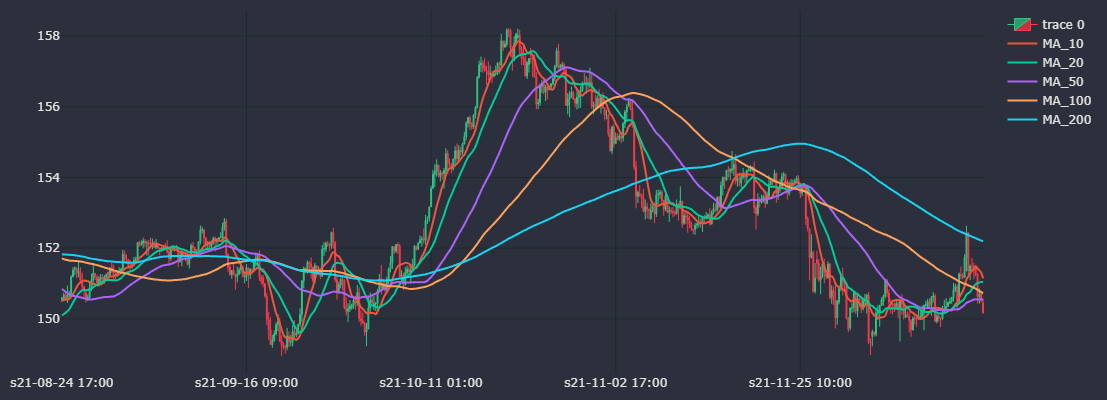

In [40]:
cp.show_plot(line_traces=traces)

In [60]:
MA_S = 'MA_50'
MA_L = 'MA_200'
BUY = 1
SELL = -1
NONE = 0

In [61]:
df_an = df_ma[['time','mid_o', 'mid_h', 'mid_l', 'mid_c',MA_S,MA_L]].copy()

In [62]:
df_an.head(100)

time    mid_o    mid_h    mid_l    mid_c      MA_50  \
0  2021-08-24 17:00:00+00:00  150.538  150.620  150.480  150.586  150.84446   
1  2021-08-24 21:00:00+00:00  150.514  150.742  150.514  150.672  150.80714   
2  2021-08-25 01:00:00+00:00  150.674  150.771  150.524  150.552  150.76836   
3  2021-08-25 05:00:00+00:00  150.554  150.942  150.448  150.678  150.73196   
4  2021-08-25 09:00:00+00:00  150.676  150.791  150.616  150.714  150.69580   
..                       ...      ...      ...      ...      ...        ...   
95 2021-09-15 13:00:00+00:00  151.197  151.476  151.032  151.258  151.96570   
96 2021-09-15 17:00:00+00:00  151.261  151.452  151.243  151.380  151.95024   
97 2021-09-15 21:00:00+00:00  151.396  151.574  151.280  151.484  151.93764   
98 2021-09-16 01:00:00+00:00  151.486  151.486  151.177  151.190  151.91986   
99 2021-09-16 05:00:00+00:00  151.192  151.291  151.006  151.198  151.90086   

        MA_200  
0   151.827125  
1   151.824330  
2   151.820445  
3   151.816365  
4   151.812365  
..         ...  
95  151.706660  
96  151.697940  
97  151.692365  
98  151.685730  
99  151.679735  

[100 rows x 7 columns]

In [63]:
df_an['DELTA'] = df_an.MA_50 - df_an.MA_200
df_an['DELTA_PREV'] = df_an.DELTA.shift(1)

In [64]:
def is_trade(row):
    if row.DELTA >=0 and row.DELTA_PREV < 0:
        return BUY
    elif row.DELTA < 0 and row.DELTA_PREV >=0:
        return SELL
    return NONE

In [65]:
df_an['TRADE'] = df_an.apply(is_trade,axis = 1)

In [66]:
df_trades = df_an[df_an.TRADE != NONE].copy()

In [67]:
df_trades.shape

(31, 10)

In [68]:
df_trades.head()

time    mid_o    mid_h    mid_l    mid_c      MA_50  \
72  2021-09-09 17:00:00+00:00  152.015  152.021  151.750  151.828  151.77846   
114 2021-09-20 17:00:00+00:00  149.270  149.544  149.182  149.402  151.57646   
203 2021-10-11 13:00:00+00:00  154.175  154.512  154.029  154.352  151.38858   
338 2021-11-11 02:00:00+00:00  152.920  153.012  152.681  152.884  154.23446   
534 2021-12-27 18:00:00+00:00  154.416  154.467  154.316  154.460  151.90054   

         MA_200     DELTA  DELTA_PREV  TRADE  
72   151.777910  0.000550   -0.015855      1  
114  151.599845 -0.023385    0.012675     -1  
203  151.356965  0.031615   -0.030855      1  
338  154.252505 -0.018045    0.051735     -1  
534  151.890735  0.009805   -0.054975      1

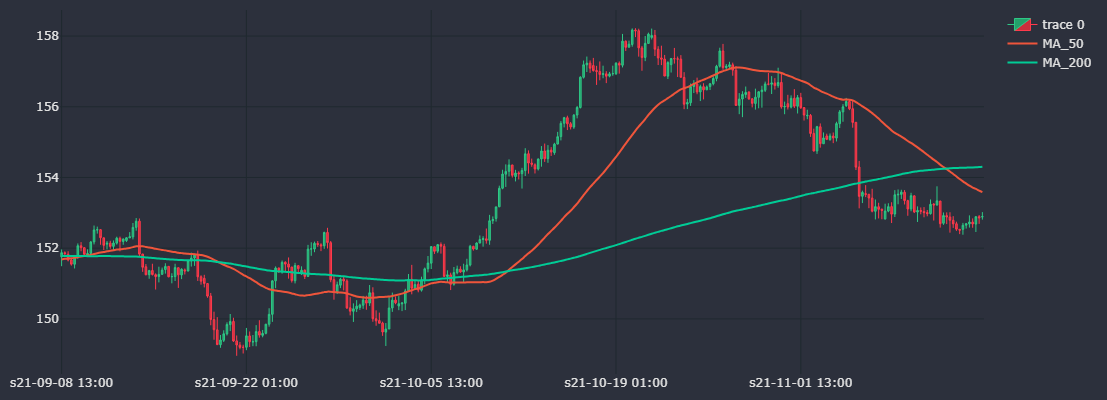

In [79]:
cp = CandlePlot(df_an.iloc[65:350])
cp.show_plot(line_traces = [MA_S,MA_L])

In [70]:
ic.LoadInstruments('../data')

In [71]:
ic.instruments_dict[pair]

{'name': 'GBP_JPY', 'ins_type': 'CURRENCY', 'displayName': 'GBP/JPY', 'pipLocation': 0.01, 'tradeUnitsPrecision': 0, 'marginRate': 0.05}

In [72]:
ins_data = ic.instruments_dict[pair]

In [73]:
df_trades.head()

time    mid_o    mid_h    mid_l    mid_c      MA_50  \
72  2021-09-09 17:00:00+00:00  152.015  152.021  151.750  151.828  151.77846   
114 2021-09-20 17:00:00+00:00  149.270  149.544  149.182  149.402  151.57646   
203 2021-10-11 13:00:00+00:00  154.175  154.512  154.029  154.352  151.38858   
338 2021-11-11 02:00:00+00:00  152.920  153.012  152.681  152.884  154.23446   
534 2021-12-27 18:00:00+00:00  154.416  154.467  154.316  154.460  151.90054   

         MA_200     DELTA  DELTA_PREV  TRADE  
72   151.777910  0.000550   -0.015855      1  
114  151.599845 -0.023385    0.012675     -1  
203  151.356965  0.031615   -0.030855      1  
338  154.252505 -0.018045    0.051735     -1  
534  151.890735  0.009805   -0.054975      1

In [74]:
df_trades['DIFF'] = df_trades.mid_c.diff().shift(-1)
df_trades.fillna(0,inplace=True)

In [75]:
df_trades['GAIN'] = df_trades.DIFF/ins_data.pipLocation
df_trades['GAIN'] = df_trades['GAIN'] * df_trades['TRADE']

In [76]:
df_trades.GAIN.sum()

-6617.000000000007

In [77]:
df_trades['GAIN_C'] = df_trades['GAIN'].cumsum()

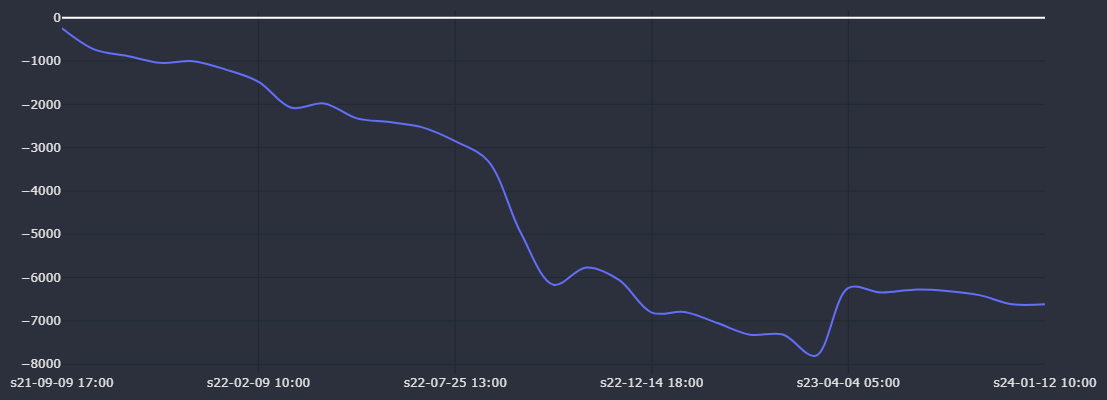

In [78]:
cp = CandlePlot(df_trades,candles=False)
cp.show_plot(line_traces=['GAIN_C'])